# Credit Card Fraud Detection

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.



## Importing Libraries


In [41]:
#from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import scikitplot as skplt
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.cluster import KMeans
import cv2
from collections import Counter
from sklearn.model_selection import KFold, cross_val_score
from sklearn import svm

## Load Dataset

In [2]:
df = pd.read_csv('creditcard.csv')
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#shuffle data for better separation
for i in range(50):
    df = df.sample(frac= 1).reset_index(drop = True)

In [4]:
# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']
X.shape, y.shape

((284807, 30), (284807,))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis (EDA)



In [7]:
# ### 2.1 Summary Statistics
# Display summary statistics for the dataset
df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.176608e-15,3.391960e-16,-1.398298e-15,2.094353e-15,1.005064e-15,1.496095e-15,-5.628318e-16,1.143626e-16,-2.412343e-15,...,1.615272e-16,-3.502979e-16,2.638274e-16,4.472617e-15,5.147192e-16,1.685477e-15,-3.658532e-16,-1.226891e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<Axes: xlabel='Class', ylabel='count'>

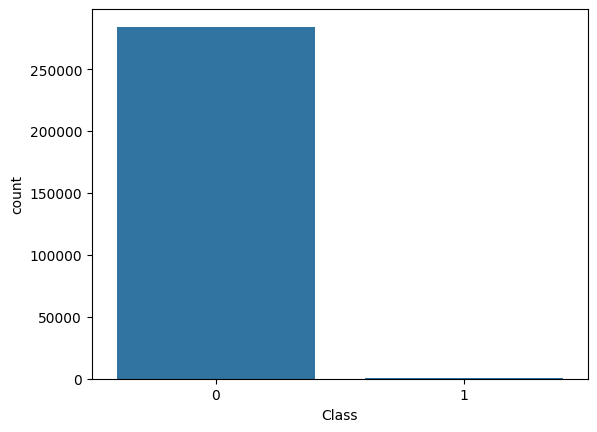

In [9]:
# ### 2.2 Class Distribution
# Visualize the class distribution
sns.countplot(x='Class', data=df)



In [10]:
# Display the class distribution in percentages

((df['Class'].value_counts() / df.shape[0]) * 100 ).rename("Proportion")



Class
0    99.827251
1     0.172749
Name: Proportion, dtype: float64

<Axes: >

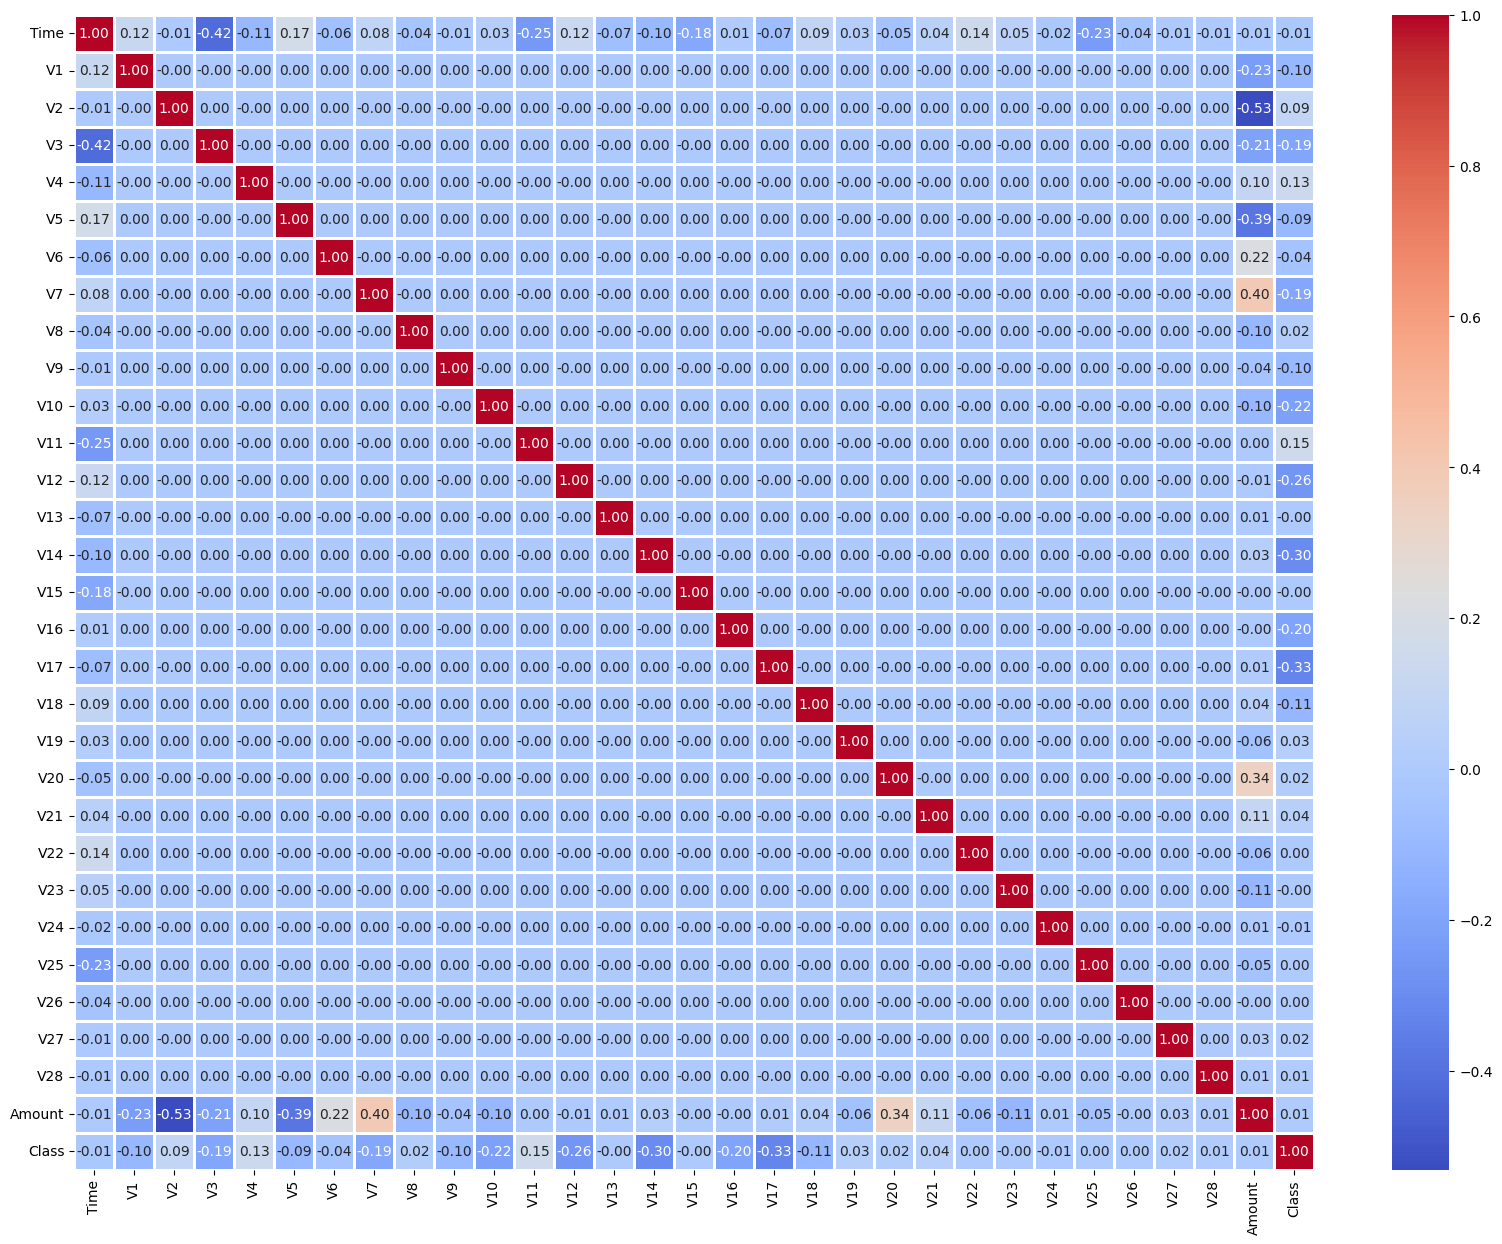

In [11]:
# ### 2.3 Correlation Matrix
# Compute the correlation matrix
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot= True, fmt=".2f", cmap= 'coolwarm', linewidths=0.9)

In [12]:
low_corr_cols = [col for col in df.corr().columns if df.corr()[col].drop(col).max() < -0.40]
df.drop(columns = low_corr_cols, inplace=True)
for i in df.columns: 
    print(f' Max correlation of {i} is with {df.corr()[i].drop(i).idxmax()} = {df.corr()[i].drop(i).max()}')

 Max correlation of Time is with V5 = 0.17307212331039198
 Max correlation of V1 is with Time = 0.11739630597838412
 Max correlation of V2 is with Class = 0.09128865034461978
 Max correlation of V3 is with V6 = 1.4069506840004278e-15
 Max correlation of V4 is with Class = 0.13344748623900238
 Max correlation of V5 is with Time = 0.17307212331039198
 Max correlation of V6 is with Amount = 0.21598118022527865
 Max correlation of V7 is with Amount = 0.39731127818169404
 Max correlation of V8 is with Class = 0.019875123914794426
 Max correlation of V9 is with V14 = 9.532214532313824e-16
 Max correlation of V10 is with Time = 0.030616628592319364
 Max correlation of V11 is with Class = 0.15487564474394866
 Max correlation of V12 is with Time = 0.12434806837193706
 Max correlation of V13 is with Amount = 0.005293409030421177
 Max correlation of V14 is with Amount = 0.03375117176310043
 Max correlation of V15 is with V16 = 9.885256167970505e-16
 Max correlation of V16 is with Time = 0.0119028

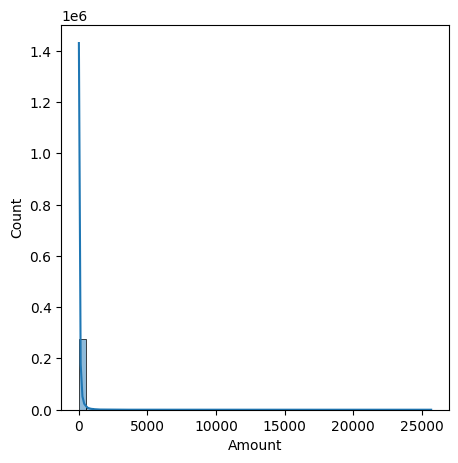

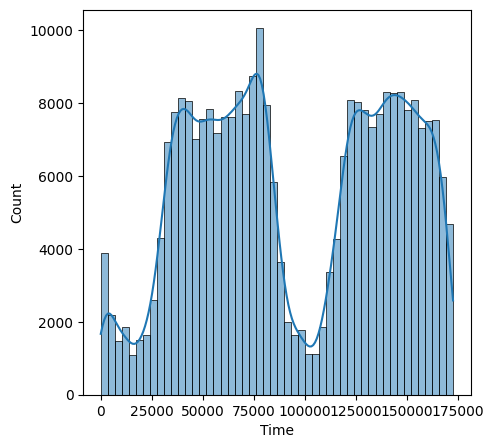

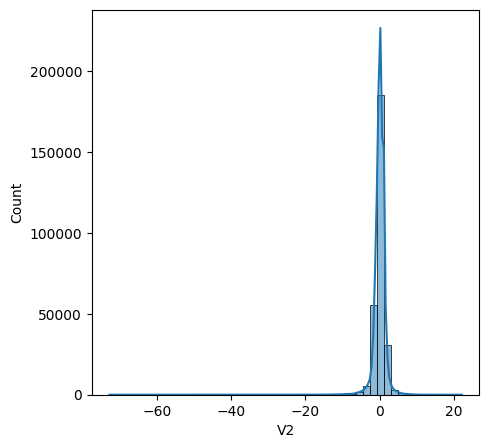

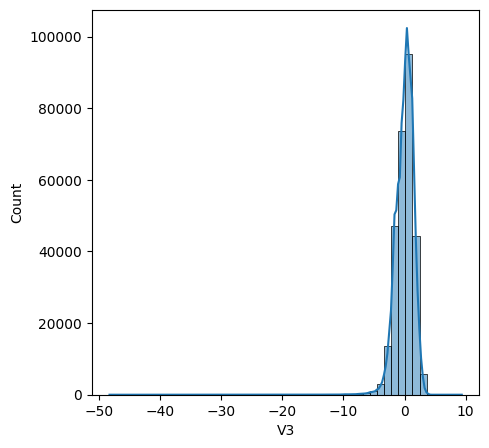

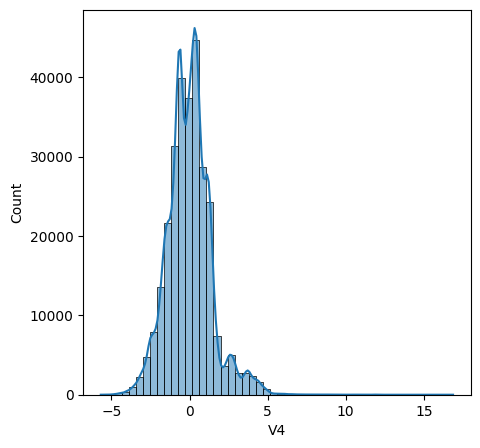

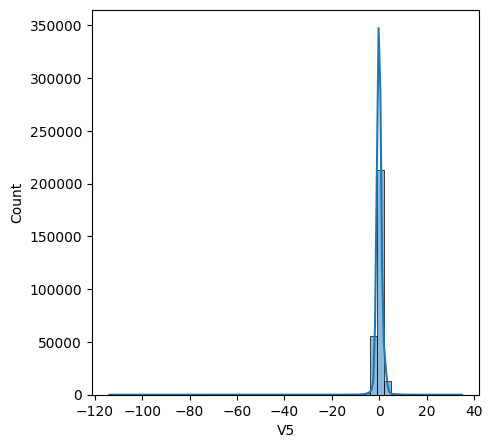

In [13]:
# ### 2.4 Feature Distributions
columns = df[['Amount', 'Time', 'V2', 'V3', 'V4', 'V5']]
for c in columns:
    plt.figure(figsize=(5,5))
    sns.histplot(df[c], kde=True, bins = 50)
    plt.show()

Time
Skew : -0.04


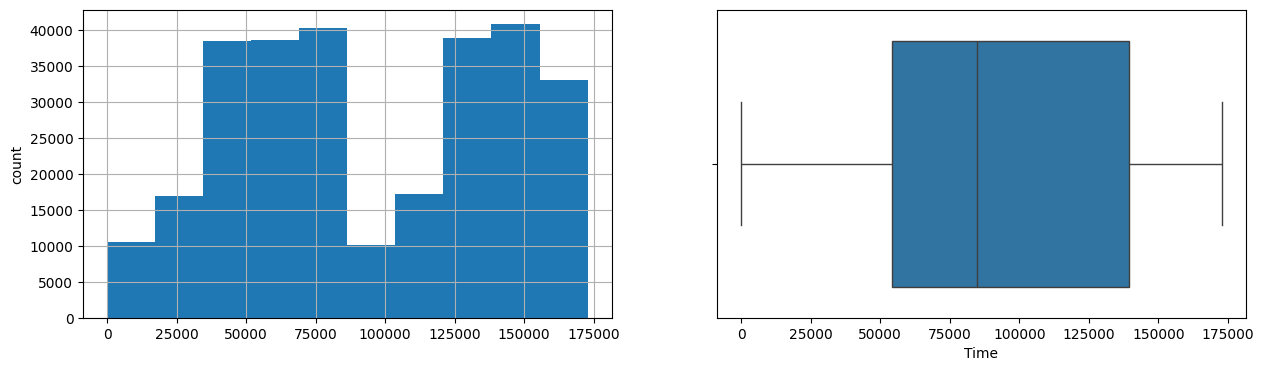

V1
Skew : -3.28


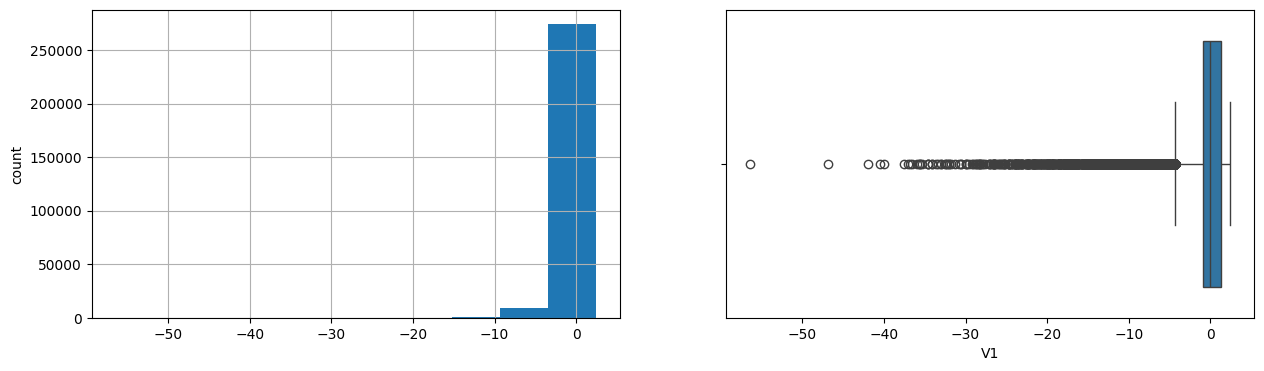

V2
Skew : -4.62


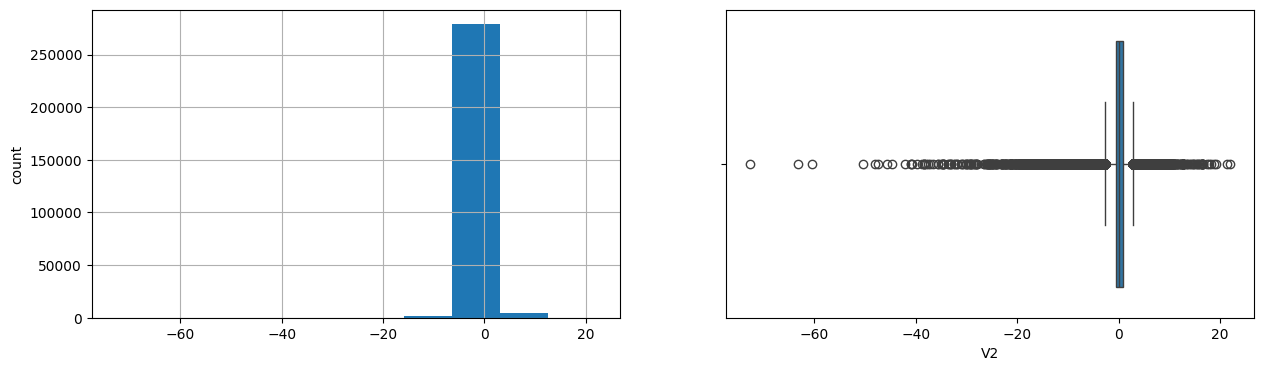

V3
Skew : -2.24


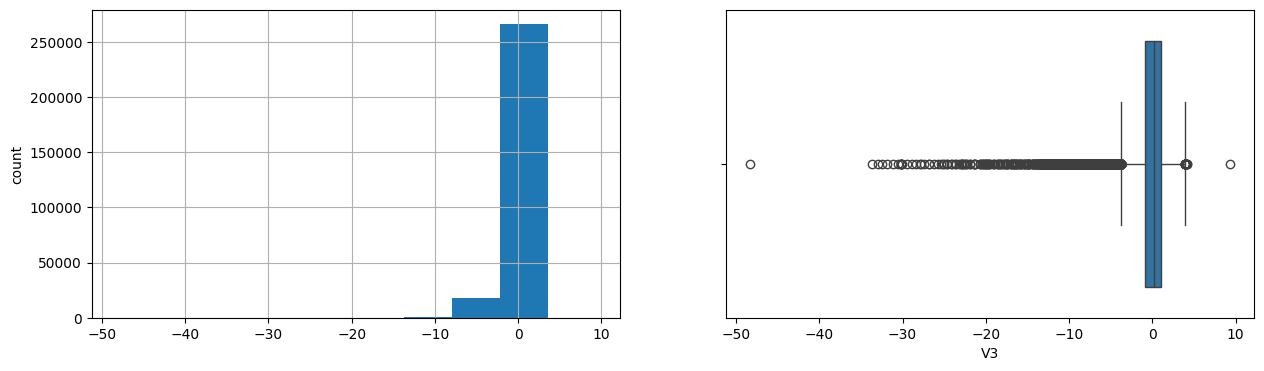

V4
Skew : 0.68


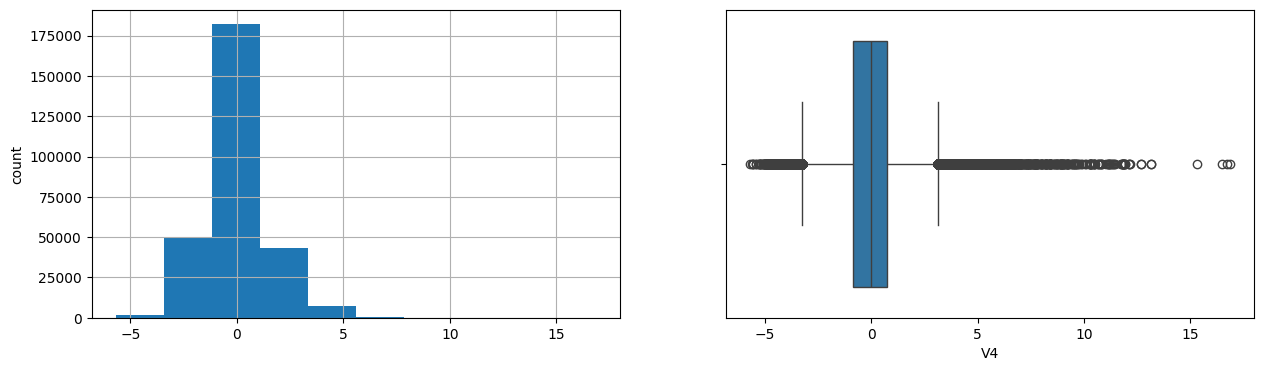

V5
Skew : -2.43


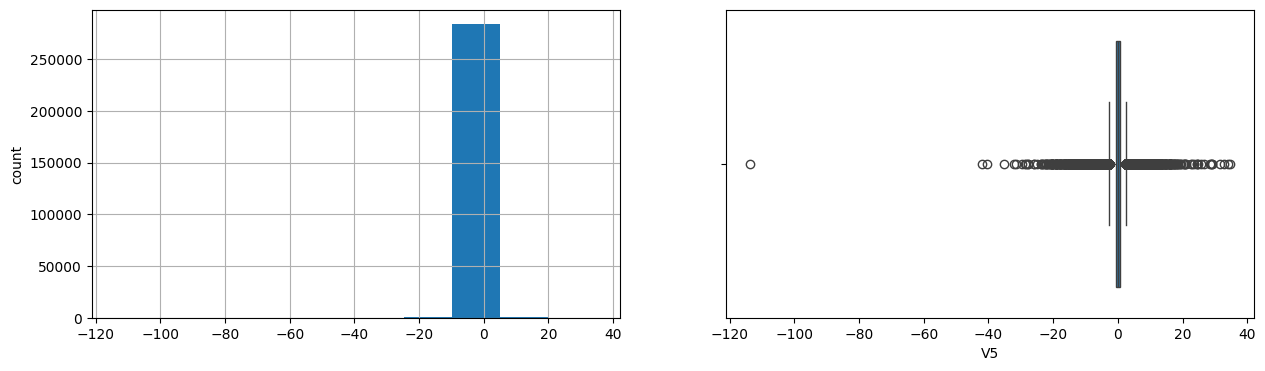

V6
Skew : 1.83


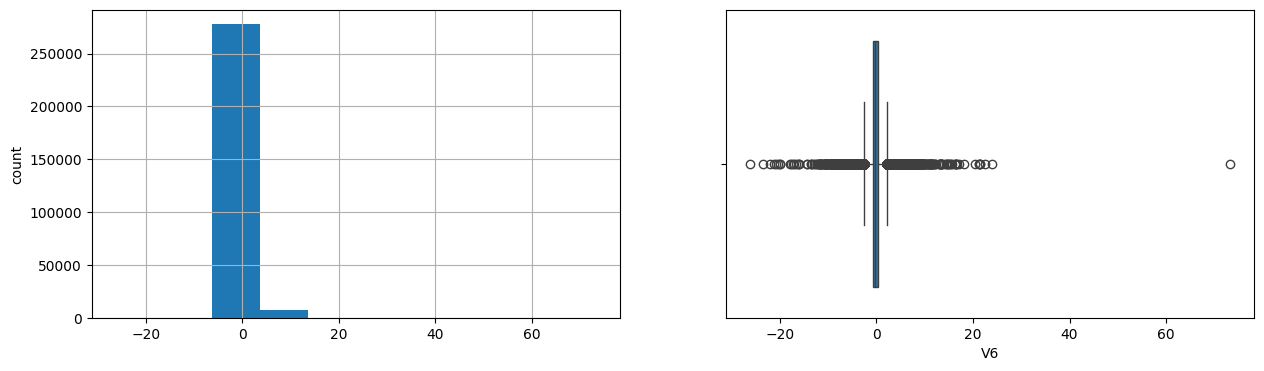

V7
Skew : 2.55


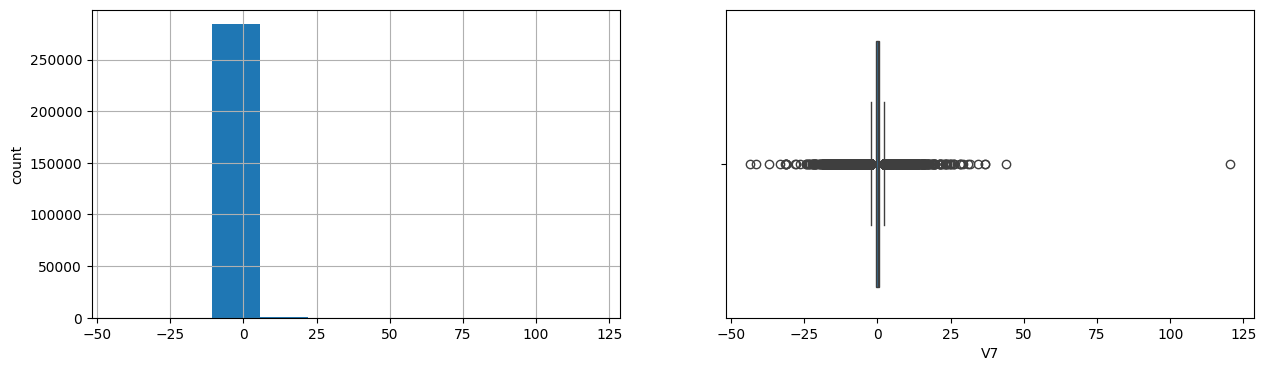

V8
Skew : -8.52


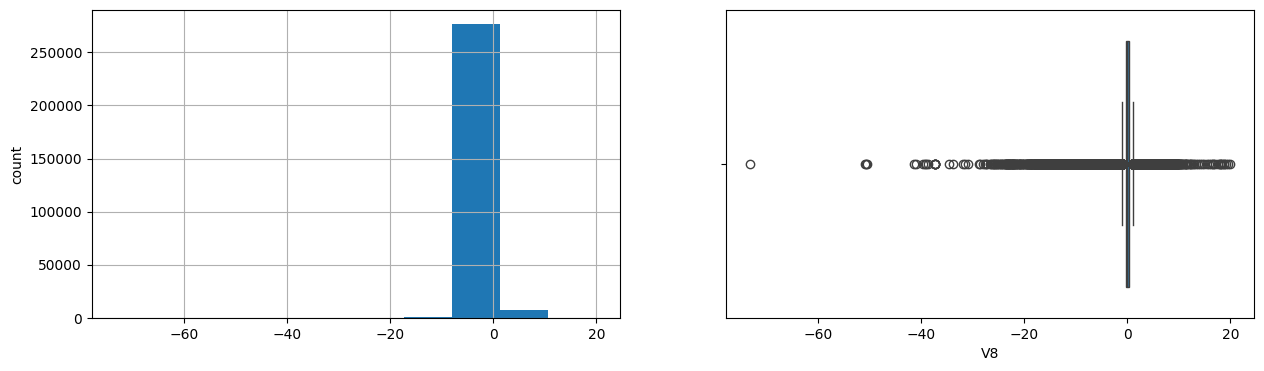

V9
Skew : 0.55


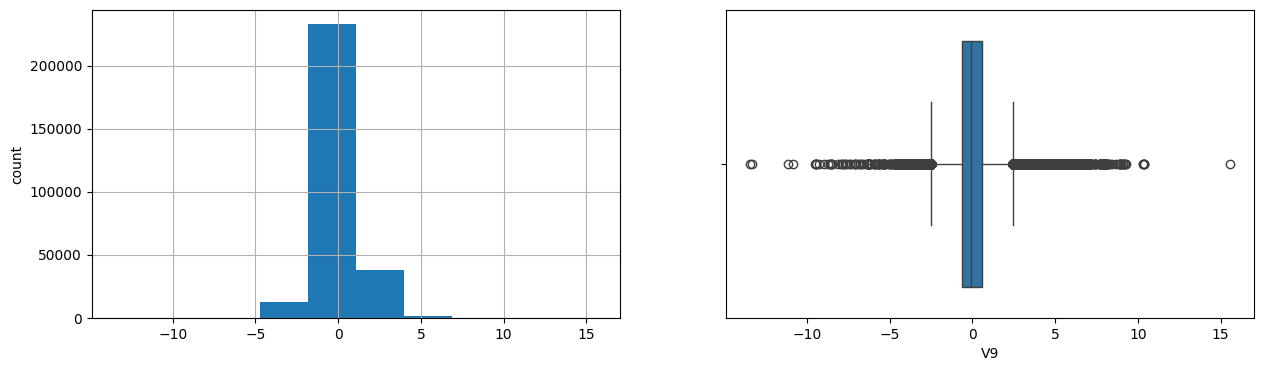

V10
Skew : 1.19


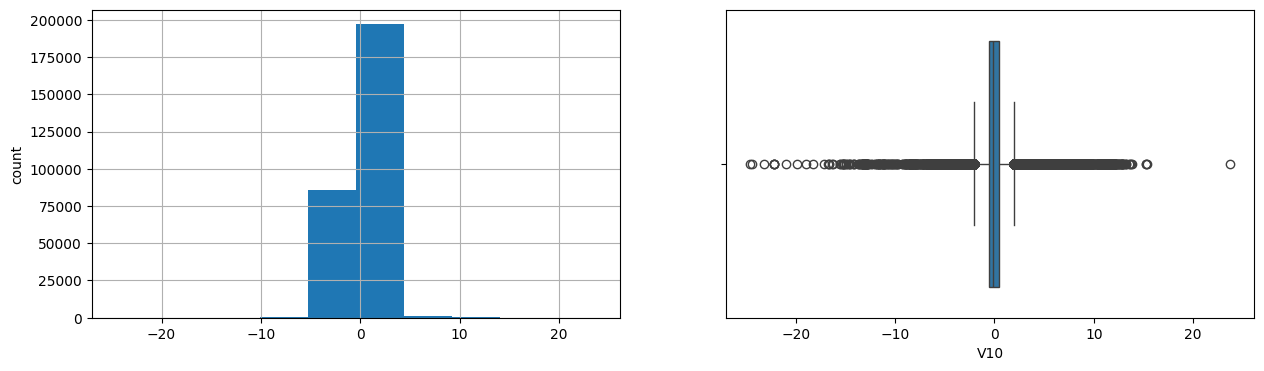

V11
Skew : 0.36


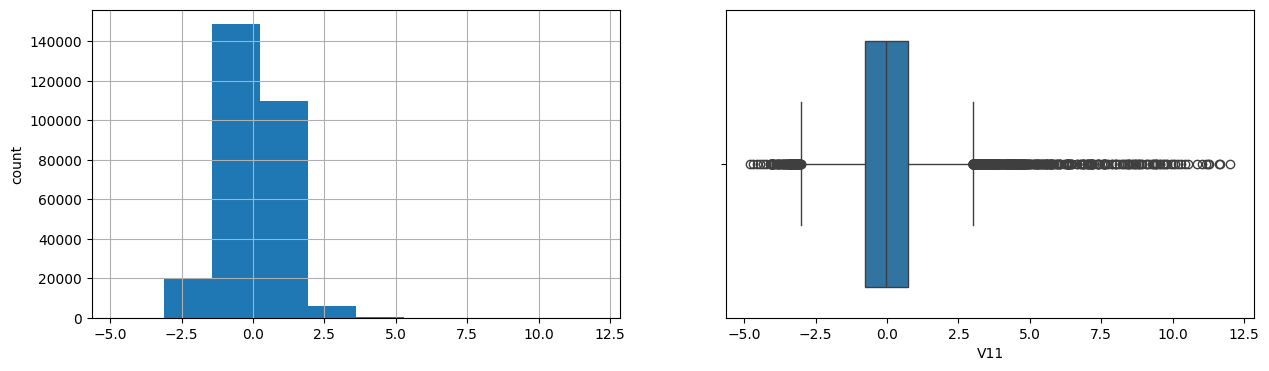

V12
Skew : -2.28


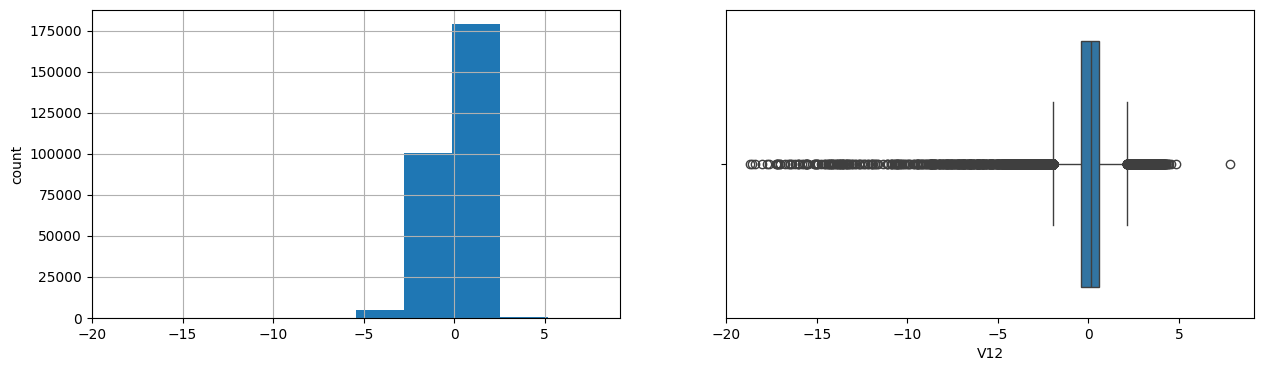

V13
Skew : 0.07


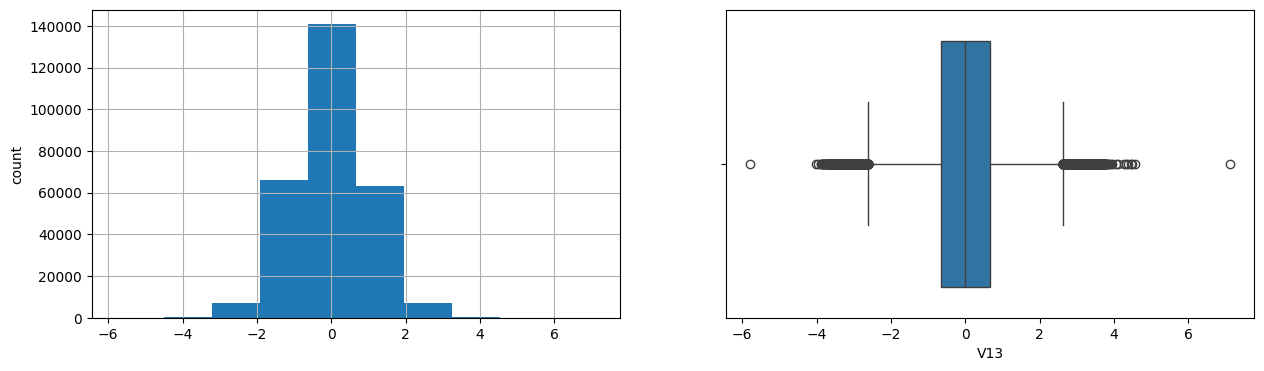

V14
Skew : -2.0


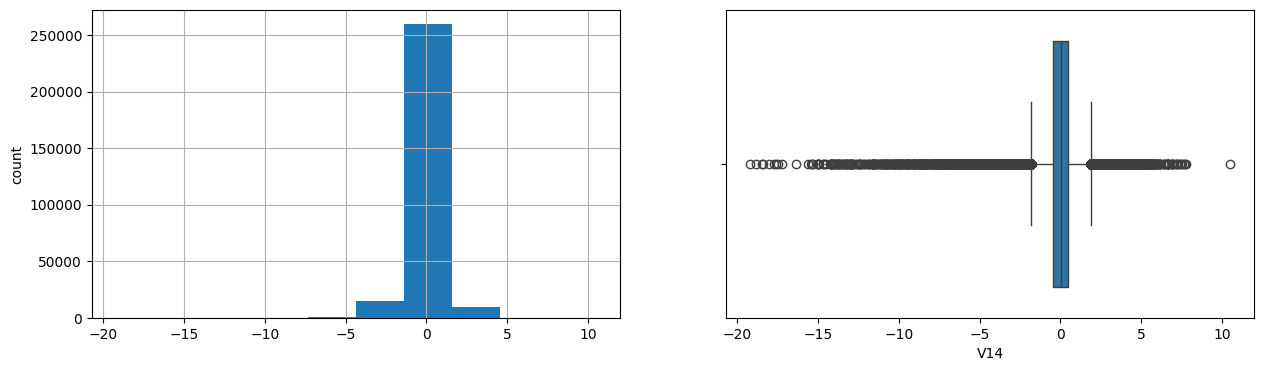

V15
Skew : -0.31


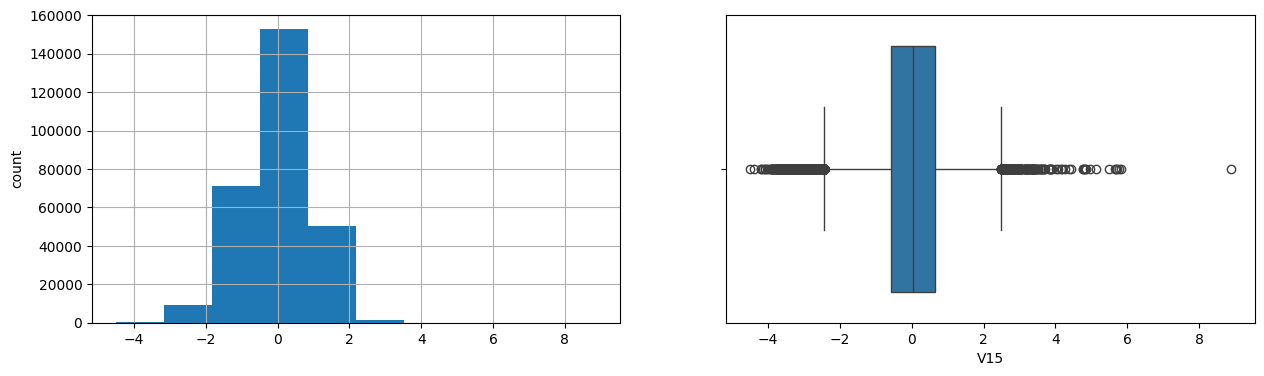

V16
Skew : -1.1


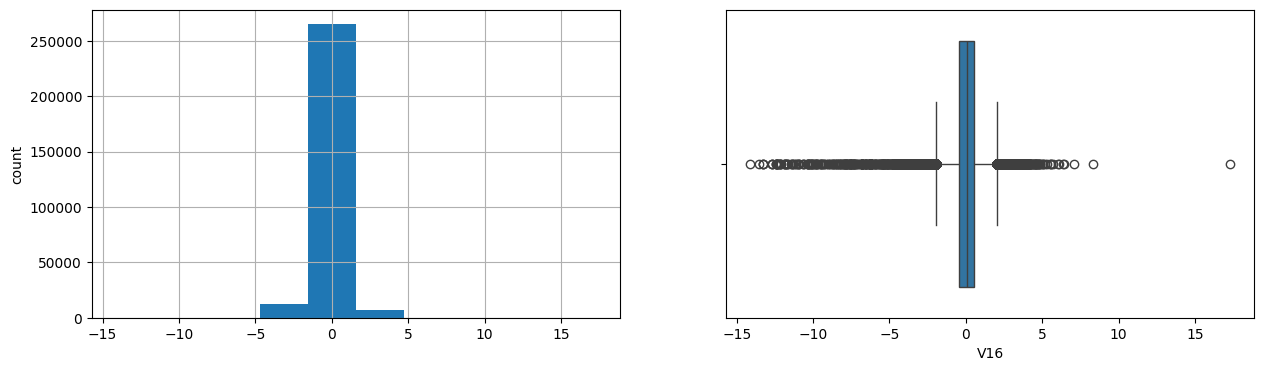

V17
Skew : -3.84


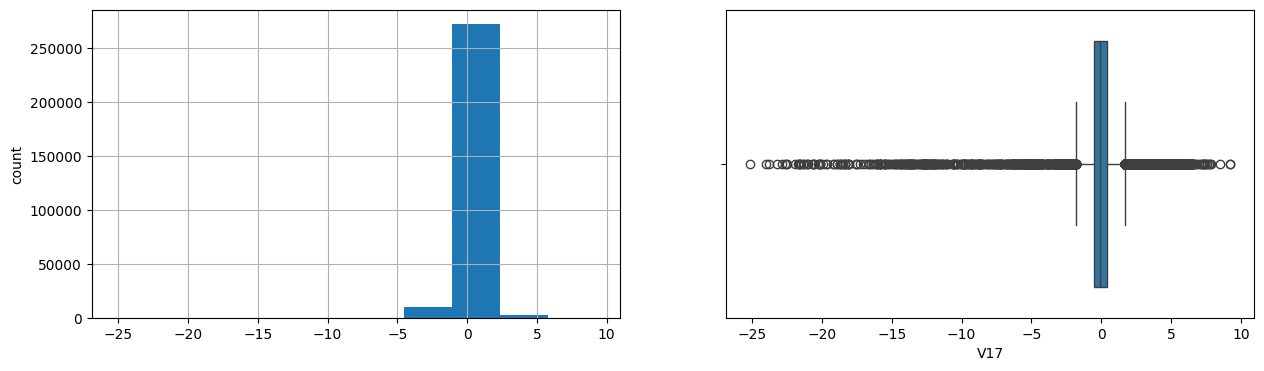

V18
Skew : -0.26


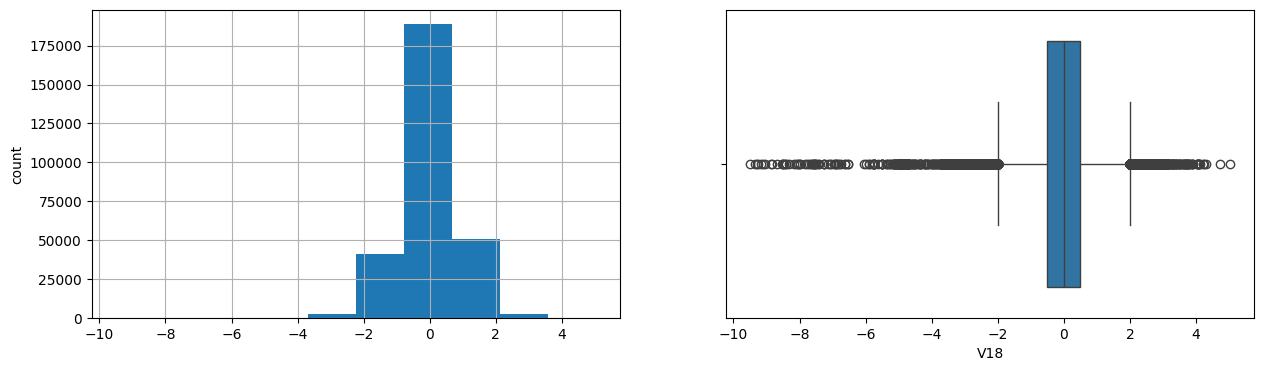

V19
Skew : 0.11


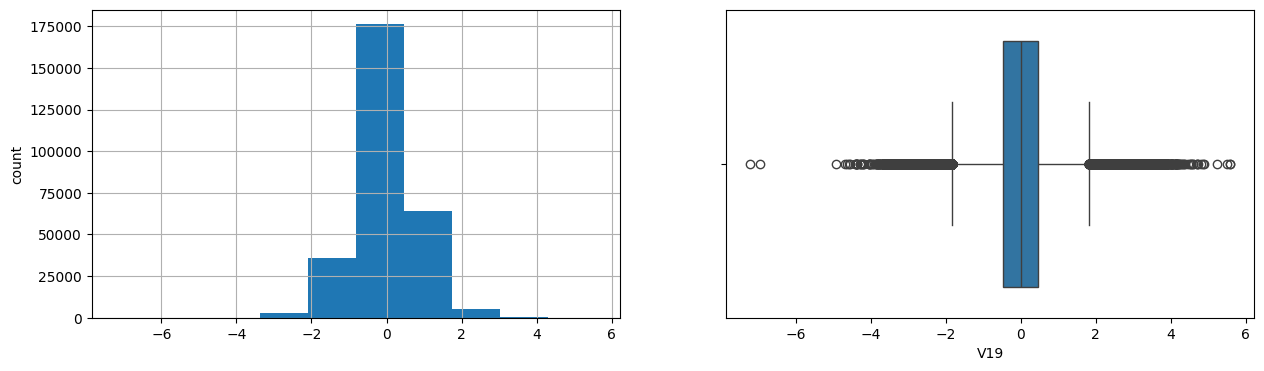

V20
Skew : -2.04


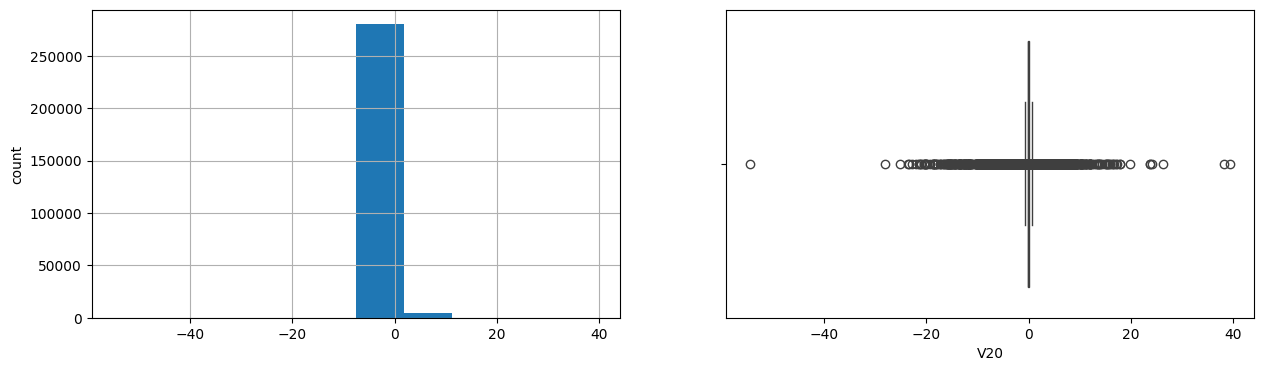

V21
Skew : 3.59


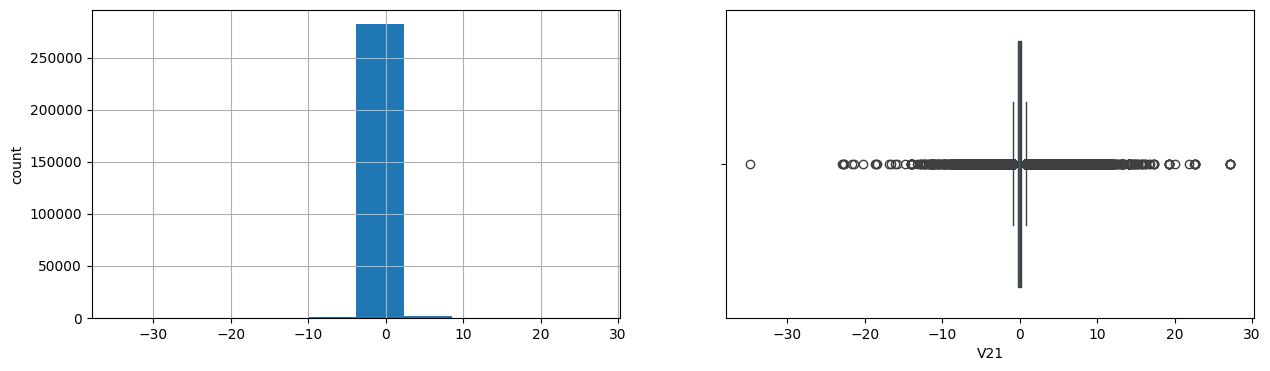

V22
Skew : -0.21


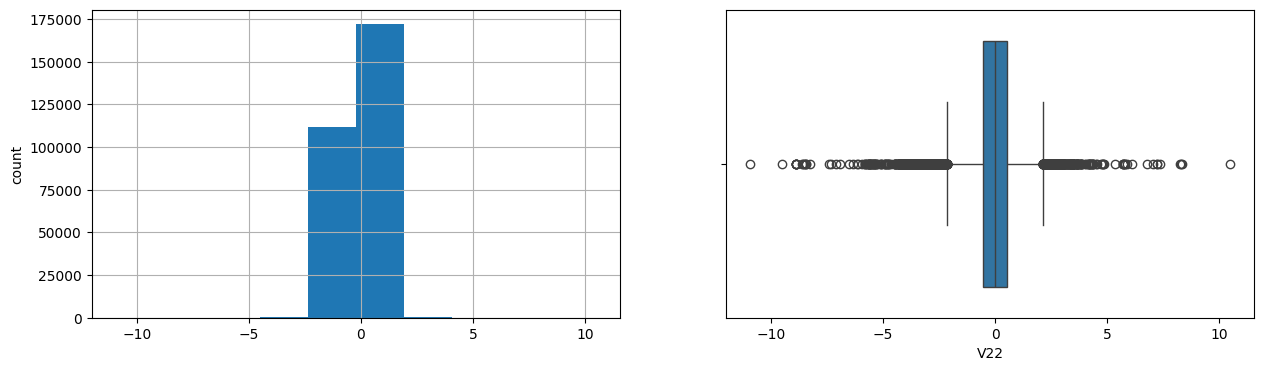

V23
Skew : -5.88


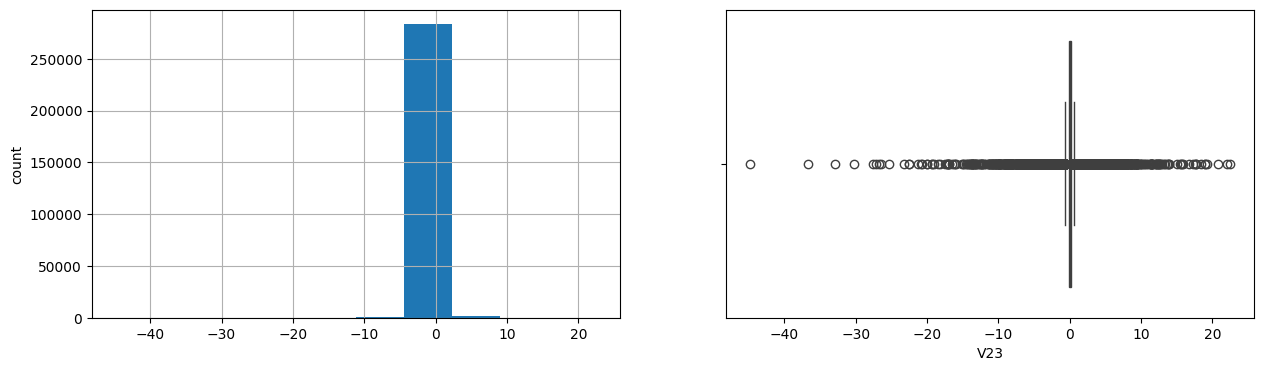

V24
Skew : -0.55


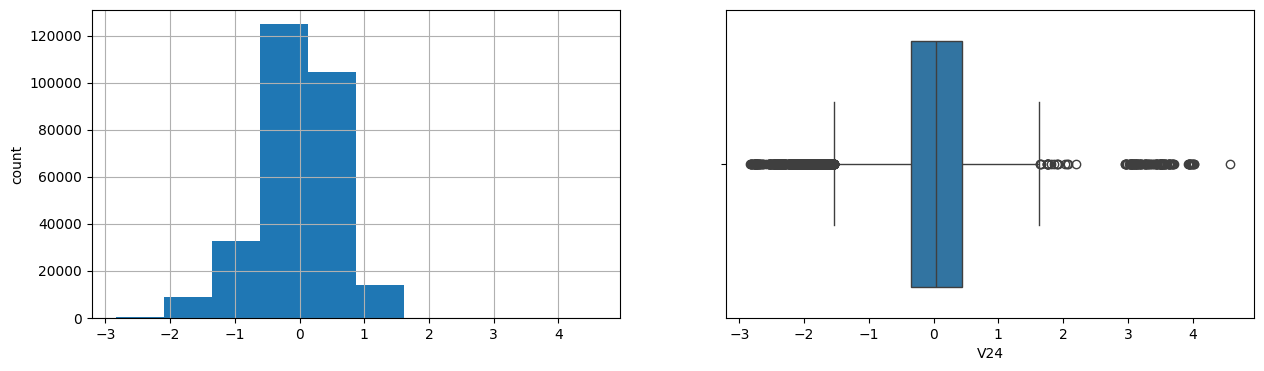

V25
Skew : -0.42


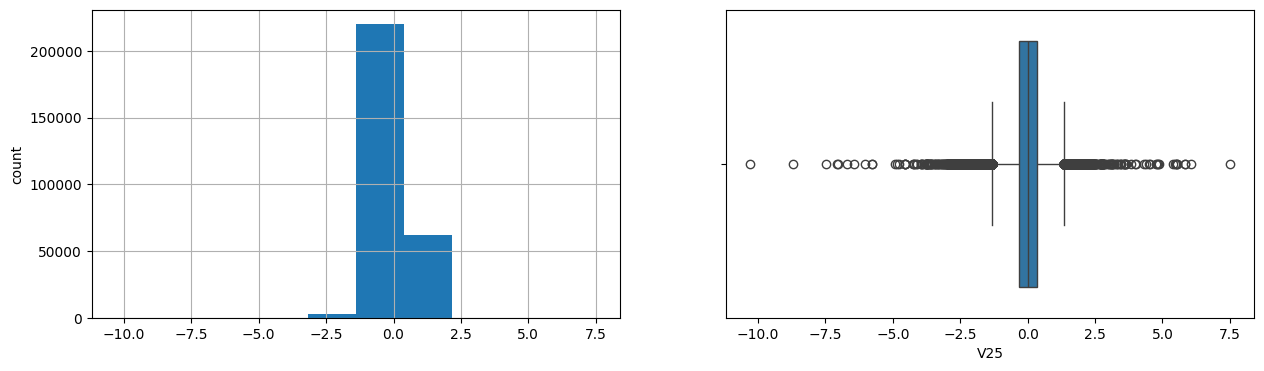

V26
Skew : 0.58


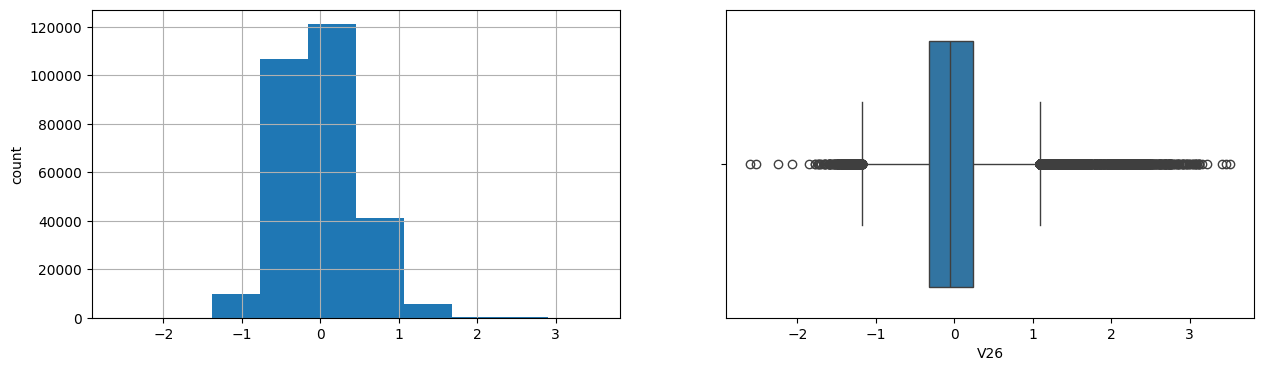

V27
Skew : -1.17


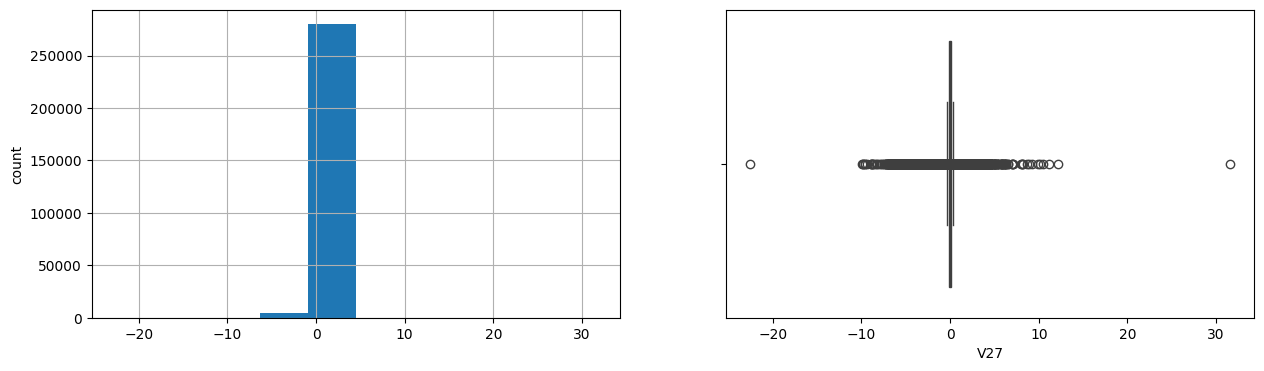

V28
Skew : 11.19


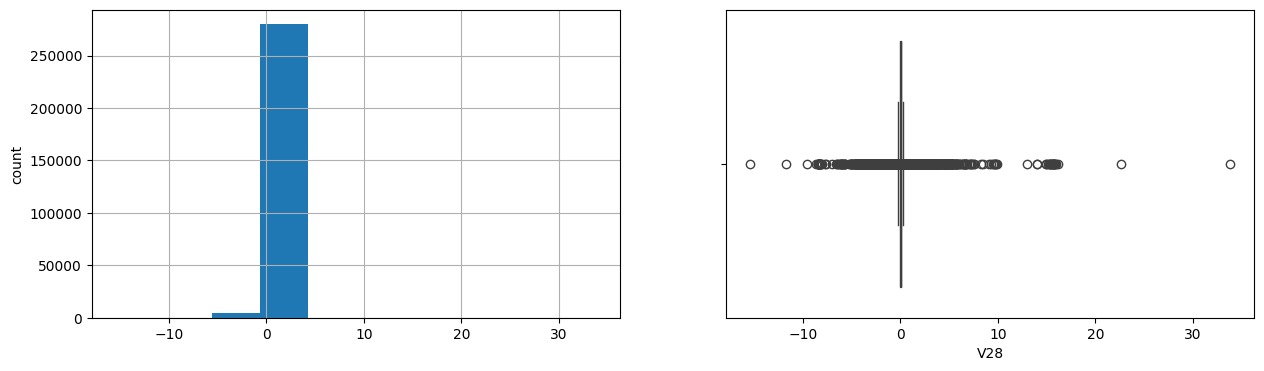

Amount
Skew : 16.98


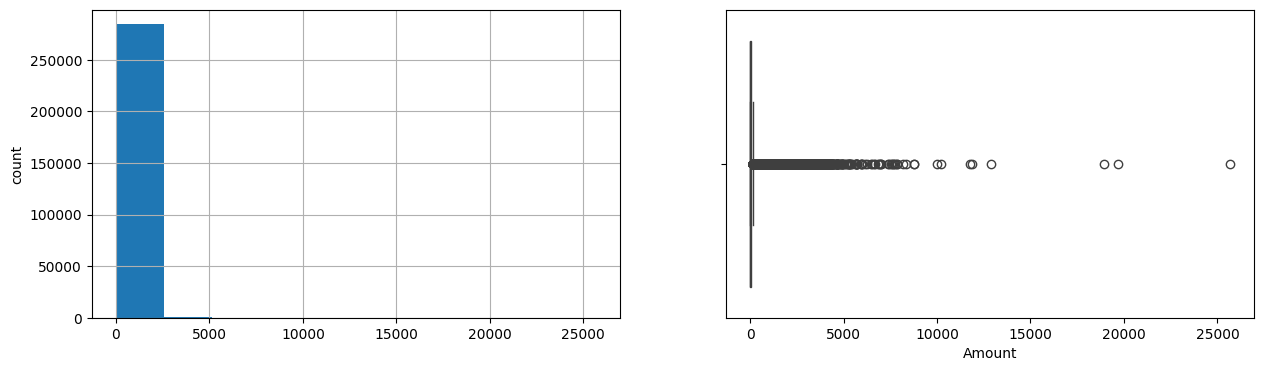

Class
Skew : 24.0


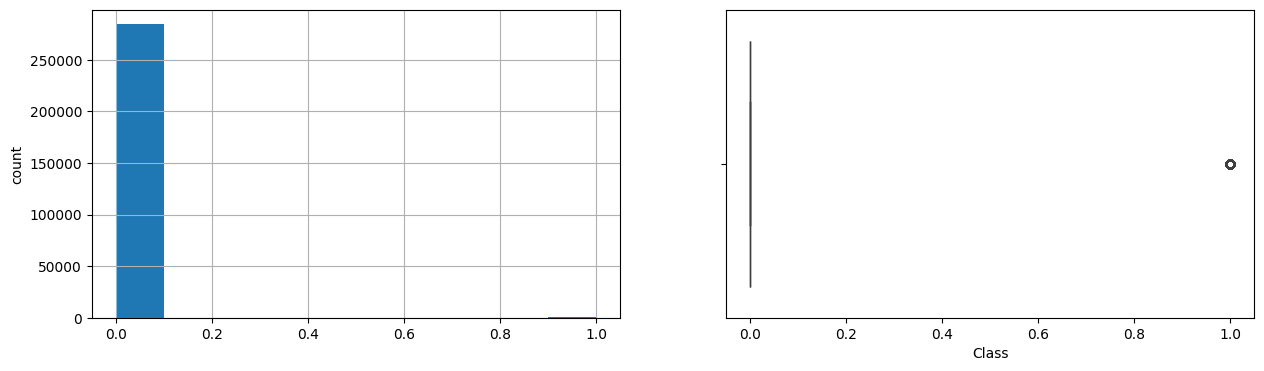

In [14]:
for col in df.columns.to_list():
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=True)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

## Data Preprocessing



In [ ]:

df_ = df.copy()
(df_.isnull().sum() == 0)


Time      True
V1        True
V2        True
V3        True
V4        True
V5        True
V6        True
V7        True
V8        True
V9        True
V10       True
V11       True
V12       True
V13       True
V14       True
V15       True
V16       True
V17       True
V18       True
V19       True
V20       True
V21       True
V22       True
V23       True
V24       True
V25       True
V26       True
V27       True
V28       True
Amount    True
Class     True
dtype: bool

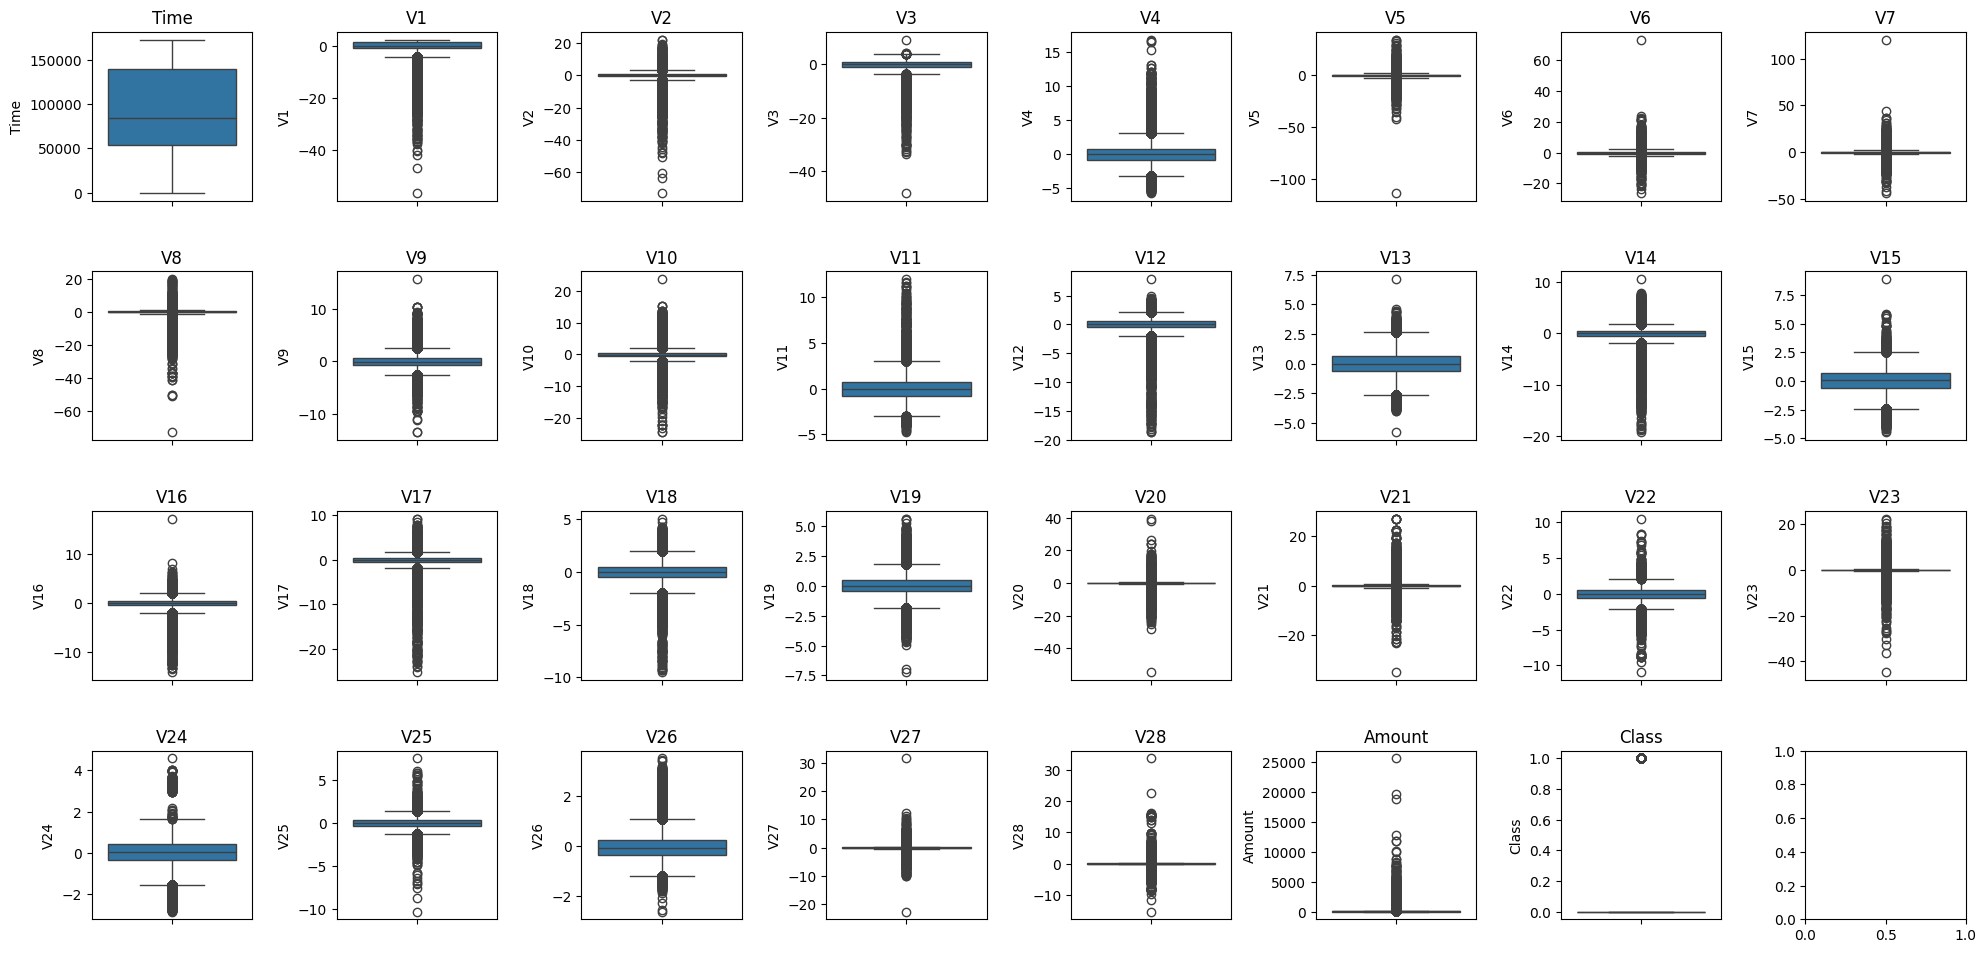

In [16]:
fig, axes = plt.subplots(4, 8, figsize=(20, 10)) 
fig.tight_layout(pad=3.0)
axes = axes.flatten()
for i , col in enumerate(df_.columns):
    sns.boxplot(df_[col],ax=axes[i])
    axes[i].set_title(col)
plt.show()

In [18]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_.drop('Class', axis=1))
df_scaled = pd.DataFrame(df_scaled, columns= df_.drop('Class', axis=1).columns)
df_scaled['Class'] = df_['Class'].values
df_scaled

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.566876,-0.407384,-0.179569,1.933573,-1.082634,-0.944045,0.486787,-0.741005,0.514273,0.123447,...,0.208662,0.986445,-0.708544,0.053593,0.988644,-0.217739,0.824528,0.343383,-0.342435,0
1,1.077747,0.855431,-0.512871,-1.245325,0.391270,1.425927,3.155648,-0.580794,0.879059,0.917941,...,-0.612268,-1.932291,0.585793,1.028618,-0.630368,-2.276791,0.123753,-0.044407,0.185233,0
2,-1.017242,-1.584695,1.575186,0.397876,-1.449463,-0.179074,-0.548123,0.778224,-0.395913,2.772650,...,-0.877348,-0.410032,0.055624,0.100611,0.335366,1.359151,0.880958,-1.015529,-0.339396,0
3,-1.898074,-0.756400,0.309386,1.596215,-1.892205,-0.506346,-0.190874,0.376062,-0.146131,2.686480,...,-0.028412,1.199891,-0.571066,0.186142,0.955190,-0.051897,1.043536,0.060057,0.041422,0
4,1.310080,-1.154486,-1.117122,0.419541,-1.297031,-0.154961,-0.507967,-0.252096,0.442796,-0.841251,...,0.972050,1.380626,0.464741,1.134889,0.498099,-0.361525,0.417338,-0.275422,0.646292,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.413811,-0.790120,0.380178,-0.649405,0.918514,0.001797,0.157189,2.126346,0.104047,-1.259406,...,0.348354,-0.099652,0.746878,0.706585,2.547561,-0.457762,-0.549648,0.150333,1.422241,0
284803,1.568713,-0.371391,0.754484,-0.052741,0.687428,-0.330698,0.550885,-0.806190,1.000746,-0.343061,...,0.469999,1.120182,-0.334382,0.062676,-0.974317,2.199903,-0.473710,0.127411,-0.303013,0
284804,-0.679410,0.644855,0.144698,0.016797,0.297879,-0.027708,-0.278530,-0.063255,0.021969,-0.069994,...,-0.394149,-1.239384,0.065353,-0.686715,0.489410,0.252988,-0.079458,0.036506,-0.349671,0
284805,-0.283963,0.609775,-0.046012,0.057567,0.545920,0.100819,0.512776,-0.289889,0.178004,0.196745,...,0.120561,0.196961,-0.540086,-2.313139,1.319091,-0.401546,0.057630,0.030896,-0.151326,0


In [19]:
for i in range(50):
    df_cleaned = df_scaled.sample(frac= 1).reset_index(drop = True)
X = df_cleaned.drop(columns='Class', axis=1)
y = df_cleaned['Class']

In [20]:

print(f'Class distribution before undersampling: {Counter(y)}')
smote = SMOTE(sampling_strategy='auto', random_state=42)
x_oversampled, y_oversampled = smote.fit_resample(X, y)
print(f'Class distribution after undersampling: {Counter(y_oversampled)}')
df_oversampled = pd.DataFrame(x_oversampled, columns=X.columns)
df_oversampled['Class'] = y_oversampled
df_oversampled

Class distribution before undersampling: Counter({0: 284315, 1: 492})
Class distribution after undersampling: Counter({0: 284315, 1: 284315})


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.066203,1.121387,-0.825060,-0.184940,-1.015375,-1.000776,-0.187566,-1.175431,-0.114657,-0.073984,...,-0.675787,-1.024388,0.626762,-0.723064,-1.141826,-1.095413,0.022579,-0.144718,-0.193506,0
1,0.576169,1.114979,-0.426429,-0.888807,-0.485921,-0.447231,-0.556276,-0.742863,-0.091487,0.158166,...,0.258659,0.861684,0.036145,-1.261353,-0.138606,-0.095090,0.062508,-0.057353,-0.273468,0
2,0.934069,-0.612566,-0.300378,0.419560,-1.148156,-0.106694,-0.686474,1.352794,-0.266601,-1.512309,...,-0.471121,-1.516064,0.403241,-0.139693,1.532764,1.152766,-0.406350,0.152835,0.645493,0
3,-1.272696,0.656306,-0.541785,0.533947,-0.600056,-0.890007,0.171916,-1.033692,0.258571,-0.414049,...,0.589486,1.538122,-0.195947,-0.470826,0.617620,-0.029850,0.097321,0.026262,-0.253317,0
4,-0.337219,-0.232852,0.560189,1.394015,0.741603,-0.256021,-0.082448,0.176569,0.083057,0.090424,...,0.216307,1.195192,-0.427188,0.747023,-0.024735,-0.357729,1.103664,0.649251,-0.343594,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,1.242363,-0.322326,2.220140,-3.649853,3.972007,1.213082,-1.758951,-0.740169,0.592879,-3.405495,...,0.436120,-0.654789,-0.120700,-1.090221,-1.237075,0.144498,1.207992,0.871567,-0.353229,1
568626,-0.190208,-1.548349,1.830967,-3.690991,2.706376,-1.588520,-1.108204,-4.060884,1.871900,-2.645641,...,1.209452,-0.085761,-0.679702,-1.249980,0.228954,-0.280823,2.961336,0.540870,-0.073872,1
568627,0.164872,-2.161130,2.965623,-5.767481,5.805112,-2.195814,-1.345045,-5.515357,2.546452,-3.199315,...,1.551655,0.311220,0.354945,-0.904395,-0.575104,0.659969,-0.613640,-2.311010,-0.351273,1
568628,-0.412019,-1.475823,0.880828,-0.611952,1.348192,-0.654155,-0.475055,-2.329811,0.436126,-1.012180,...,0.641865,0.533362,-1.079774,0.045007,0.283090,-0.813024,0.908301,0.492424,-0.296388,1


In [21]:
df_cleaned = df_oversampled.copy()
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
outliers = iso_forest.fit_predict(df_cleaned)
df_cleaned["outliers"] = outliers
counts = df_cleaned.groupby(['Class', 'outliers']).size()
print(counts)

Class  outliers
0      -1            1828
        1          282487
1      -1           55031
        1          229284
dtype: int64


In [22]:
df_cleaned = df_cleaned[df_cleaned["outliers"] == 1].drop(columns=["outliers"])
df_cleaned['Class'].value_counts()

Class
0    282487
1    229284
Name: count, dtype: int64

In [23]:
for k, v in df_cleaned.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))


Column Time outliers = 0.00%
Column V1 outliers = 9.35%
Column V2 outliers = 8.81%
Column V3 outliers = 4.81%
Column V4 outliers = 0.28%
Column V5 outliers = 14.04%
Column V6 outliers = 12.62%
Column V7 outliers = 12.36%
Column V8 outliers = 20.32%
Column V9 outliers = 4.95%
Column V10 outliers = 4.52%
Column V11 outliers = 1.11%
Column V12 outliers = 4.63%
Column V13 outliers = 1.15%
Column V14 outliers = 1.10%
Column V15 outliers = 1.68%
Column V16 outliers = 10.16%
Column V17 outliers = 17.59%
Column V18 outliers = 16.79%
Column V19 outliers = 5.60%
Column V20 outliers = 15.29%
Column V21 outliers = 11.45%
Column V22 outliers = 1.45%
Column V23 outliers = 15.99%
Column V24 outliers = 2.89%
Column V25 outliers = 5.24%
Column V26 outliers = 1.80%
Column V27 outliers = 17.26%
Column V28 outliers = 16.00%
Column Amount outliers = 18.31%
Column Class outliers = 0.00%


In [24]:
for i in range(50):
    df_cleaned = df_cleaned.sample(frac= 1).reset_index(drop = True)
X = df_cleaned.drop(columns='Class', axis=1)
y = df_cleaned['Class']

## Training








### Logistic Regression

### with preprocessed data

In [25]:

x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size = 0.5, random_state = 42, shuffle = True)

In [26]:
model = LogisticRegression(max_iter=10000)
model.fit(x_train, y_train)
y_val_pred = model.predict(x_val)
y_val_pred.shape, y_val_pred

((51177,), array([1, 1, 0, ..., 1, 0, 0], dtype=int64))

In [27]:
k_fold = KFold(n_splits = 5)
cross_val_accuracy = cross_val_score (model, X,y, cv = k_fold, scoring = 'accuracy')
cross_val_precision = cross_val_score (model, X,y, cv = k_fold, scoring = 'precision')
cross_val_recall = cross_val_score (model, X,y, cv = k_fold, scoring = 'recall')
print(f'k_fold {k_fold}')
print(f'accuracy {cross_val_accuracy.mean()}')
print(f'precision {cross_val_precision.mean()}')
print(f'recall {cross_val_recall.mean()}')

k_fold KFold(n_splits=5, random_state=None, shuffle=False)
accuracy 0.9445787284226386
precision 0.9669085147073506
recall 0.9073538016925037


              precision    recall  f1-score   support

           0       0.93      0.97      0.95     28317
           1       0.97      0.91      0.94     22860

    accuracy                           0.94     51177
   macro avg       0.95      0.94      0.94     51177
weighted avg       0.95      0.94      0.94     51177



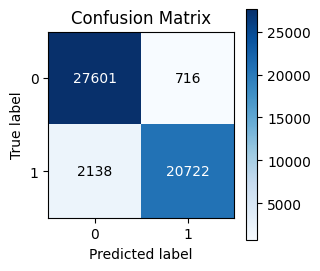

In [28]:
skplt.metrics.plot_confusion_matrix(y_val, y_val_pred, figsize=(3, 3))
print(classification_report(y_val, y_val_pred))

### With raw data

In [29]:
X_raw = df_.drop(columns='Class', axis=1)
y_raw = df_['Class']
x_train_raw, x_temp, y_train_raw, y_temp = train_test_split(X_raw, y_raw, test_size=0.2, random_state=42, shuffle = True)
x_val_raw, x_test_raw, y_val_raw, y_test_raw = train_test_split(x_temp, y_temp, test_size = 0.5, random_state = 42, shuffle = True)
model = LogisticRegression(max_iter=10000)
model.fit(x_train_raw, y_train_raw)
y_val_pred_raw = model.predict(x_val_raw)
y_val_pred_raw.shape, y_val_pred_raw

((28481,), array([0, 0, 0, ..., 0, 0, 0], dtype=int64))

In [30]:
k_fold = KFold(n_splits = 5)
cross_val_accuracy = cross_val_score (model, X_raw,y_raw, cv = k_fold, scoring = 'accuracy')
cross_val_precision = cross_val_score (model,X_raw,y_raw, cv = k_fold, scoring = 'precision')
cross_val_recall = cross_val_score (model, X_raw,y_raw, cv = k_fold, scoring = 'recall')
print(f'k_fold {k_fold}')
print(f'accuracy {cross_val_accuracy.mean()}')
print(f'precision {cross_val_precision.mean()}')
print(f'recall {cross_val_recall.mean()}')

k_fold KFold(n_splits=5, random_state=None, shuffle=False)
accuracy 0.9991538130315311
precision 0.8506429327708027
recall 0.6236770970175074


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28436
           1       0.82      0.51      0.63        45

    accuracy                           1.00     28481
   macro avg       0.91      0.76      0.81     28481
weighted avg       1.00      1.00      1.00     28481



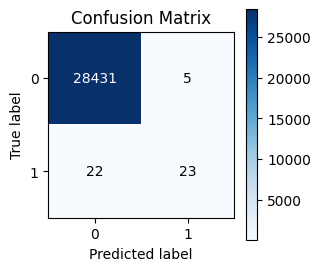

In [31]:
skplt.metrics.plot_confusion_matrix(y_val_raw, y_val_pred_raw, figsize=(3, 3))
print(classification_report(y_val_raw, y_val_pred_raw))

### SVM



### with preprocessed data

In [69]:
x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size = 0.5, random_state = 42, shuffle = True)
svm_model = svm.SVC(kernel='rbf')

In [70]:
svm_model.fit(x_train, y_train) 

SVC()

In [71]:
y_val_pred_svm = svm_model.predict(x_val)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     28304
           1       0.99      0.99      0.99     22873

    accuracy                           0.99     51177
   macro avg       0.99      0.99      0.99     51177
weighted avg       0.99      0.99      0.99     51177



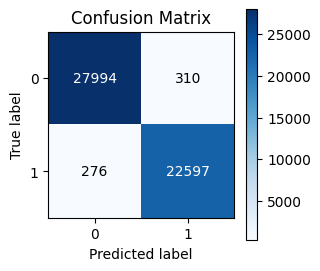

In [72]:
skplt.metrics.plot_confusion_matrix(y_val, y_val_pred_svm, figsize=(3, 3))
print(classification_report(y_val, y_val_pred_svm))

### with raw data

In [42]:
x_train_raw, x_temp, y_train_raw, y_temp = train_test_split(X_raw, y_raw, test_size=0.2, random_state=42, shuffle = True)
x_val_raw, x_test_raw, y_val_raw, y_test_raw = train_test_split(x_temp, y_temp, test_size = 0.5, random_state = 42, shuffle = True)
svm_model = svm.SVC(kernel='rbf')

In [43]:
svm_model.fit(x_train_raw, y_train_raw) 

SVC()

In [44]:
y_val_pred_svm_raw = svm_model.predict(x_val_raw)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28436
           1       0.00      0.00      0.00        45

    accuracy                           1.00     28481
   macro avg       0.50      0.50      0.50     28481
weighted avg       1.00      1.00      1.00     28481



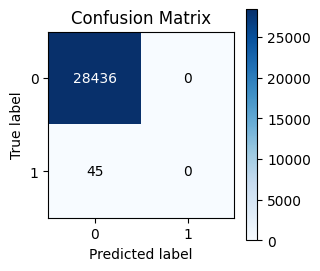

In [45]:
skplt.metrics.plot_confusion_matrix(y_val_raw, y_val_pred_svm_raw, figsize=(3, 3))
print(classification_report(y_val_raw, y_val_pred_svm_raw))